In [125]:
import requests
import pandas as pd
import xml.etree.ElementTree as ET
import time
import csv
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers


pd.get_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

X3 and Y3 are the dataset with the target variable divided into 3 groups, low score, medium score, and high score, wherewas Y2 and X2 are the target variable divided just into above and below average.  

In [55]:
X3=pd.read_pickle('X3.pkl')
X2=pd.read_pickle('X2.pkl')
y3=pd.read_pickle('y3.pkl')
y2=pd.read_pickle('y2.pkl')

Logreg 

2 Bin set

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

#we give our estimators as a list of tuples: name:function.
estimators = [('normalise', StandardScaler()),
              
              ('logreg', LogisticRegression(max_iter=500))]

pipe = Pipeline(estimators)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
    
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.659834871296746
0.6476301476301476


Text(0.5, 1.0, 'Top positive predicitors of above average board game')

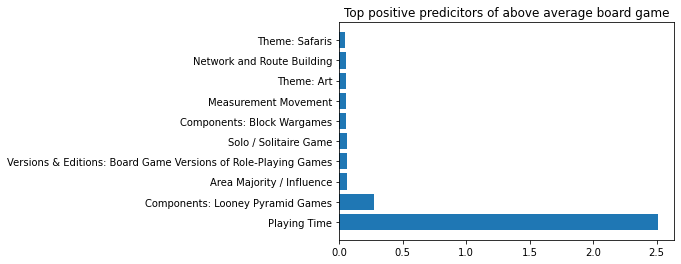

In [127]:
importances=[]
names=[]
i=0

for importance, name in sorted(zip(pipe.named_steps['logreg'].coef_[0],X_train.columns), reverse=True):
    importances.append(importance)
    names.append(name)
    i+=1
    if i==10:
        break
plt.barh(names, importances)
plt.title("Top positive predicitors of above average board game")

In [147]:
#So the above tells us higher playing time is a predictor for success.  
#Lets take a look at the average play time for a popular game
dfonehot2[dfonehot2['User Score']>dfonehot['User Score'].mean()]['Playing Time'].mean()

129.71992199219923

Looks like about two hours is popular

Text(0.5, 1.0, 'Top negative predicitors of above average board game')

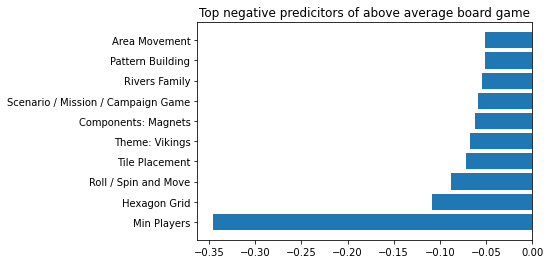

In [128]:
importances=[]
names=[]
i=0

for importance, name in sorted(zip(pipe.named_steps['logreg'].coef_[0],X_train.columns), reverse=False):
    importances.append(importance)
    names.append(name)
    i+=1
    if i==10:
        break
plt.barh(names, importances)
plt.title("Top negative predicitors of above average board game")

In [148]:
#Lets take a look at how many minimum players a popular game has
dfonehot2[dfonehot2['User Score']>dfonehot['User Score'].mean()]['Min Players'].mean()

1.8535853585358535

Less than two!  Single player options are popular

Logreg 

3 Bin set

In [165]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

#we give our estimators as a list of tuples: name:function.
estimators = [('normalise', StandardScaler()),
              
              ('logreg', LogisticRegression(max_iter=500))]

pipe = Pipeline(estimators)
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=0)
    
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.4852841185041282
0.46348096348096346


Text(0.5, 1.0, 'Top positive predicitors of top third board game')

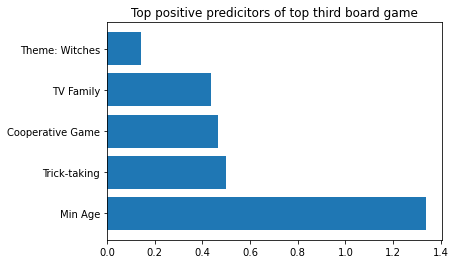

In [168]:
importances=[]
names=[]
i=0

for importance, name in sorted(zip(pipe.named_steps['logreg'].coef_[0],X_train.columns), reverse=True):
    importances.append(importance)
    names.append(name)
    i+=1
    if i==5:
        break
plt.barh(names, importances)
plt.title("Top positive predicitors of top third board game")

In [163]:
#Lets take a look at the average minimum age for a popular game 
dfonehot3[dfonehot3['Score Bins']==3]['Min Age'].mean()

8.673507462686567

Ok fair enough, games designed for those younger than 8 years probably aren't that exciting!

Text(0.5, 1.0, 'Top negative predicitors of top third board game')

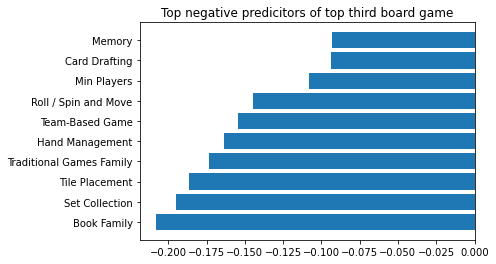

In [169]:
importances=[]
names=[]
i=0

for importance, name in sorted(zip(pipe.named_steps['logreg'].coef_[0],X_train.columns), reverse=False):
    importances.append(importance)
    names.append(name)
    i+=1
    if i==10:
        break
plt.barh(names, importances)
plt.title("Top negative predicitors of top third board game")

Decision tree Classifier

2 bins

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

#we give our estimators as a list of tuples: name:function.
estimators = [('normalise', StandardScaler()),
              
              ('DT Regressor', DecisionTreeClassifier(max_depth=8))]

pipe = Pipeline(estimators)

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
    
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.7273433705682371
0.6958041958041958


Text(0.5, 1.0, 'Top positive predicitors of above average board game')

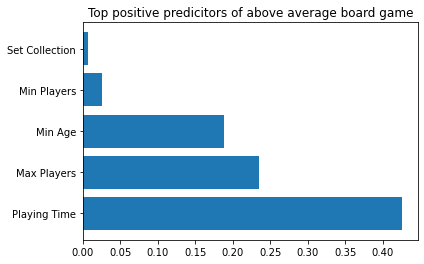

In [139]:
importances=[]
names=[]
i=0

for importance, name in sorted(zip(pipe.steps[1][1].feature_importances_,X_train.columns), reverse=True):
    importances.append(importance)
    names.append(name)
    i+=1
    if i==5:
        break
plt.barh(names, importances)
plt.title("Top positive predicitors of above average board game")

In [159]:
#So the above tells us higher playing time is a predictor for success.  
#Lets take a look at the average max players for a popular game
dfonehot2[dfonehot2['User Score']>dfonehot['User Score'].mean()]['Max Players'].mean()

4.573357335733573

Decision Tree

3 bin 

In [145]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

#we give our estimators as a list of tuples: name:function.
estimators = [('normalise', StandardScaler()),
              
              ('DT Regressor', DecisionTreeClassifier(max_depth=8))]

pipe = Pipeline(estimators)

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=0)
    
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.553861097620204
0.5291375291375291


Text(0.5, 1.0, 'Top positive predicitors of above average board game')

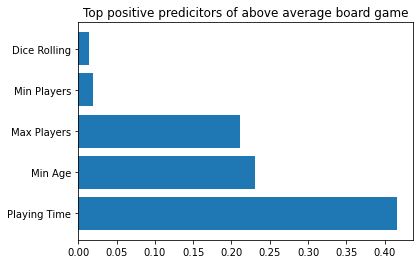

In [146]:
importances=[]
names=[]
i=0

for importance, name in sorted(zip(pipe.steps[1][1].feature_importances_,X_train.columns), reverse=True):
    importances.append(importance)
    names.append(name)
    i+=1
    if i==5:
        break
plt.barh(names, importances)
plt.title("Top positive predicitors of above average board game")

In [164]:
##Lets take a look at the min players average for a popular game
dfonehot3[dfonehot3['Score Bins']==3]['Min Players'].mean()

1.7784514925373134

Less than two!  Single player variants are popular

A few other models I tried, never performed better than the logreg and decision trees even with tuning

Tensorflow Neural Net

In [22]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(3, activation="relu"))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.BinaryAccuracy()]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
history = model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

592/592 [==============================] - 0s 657us/step - loss: 0.2786 - binary_accuracy: 0.3362
Epoch 2/100
592/592 [==============================] - 0s 713us/step - loss: -0.4822 - binary_accuracy: 0.3368
Epoch 3/100
592/592 [==============================] - 0s 610us/step - loss: -1.1571 - binary_accuracy: 0.3368
Epoch 4/100
592/592 [==============================] - 0s 625us/step - loss: -1.7748 - binary_accuracy: 0.3368
Epoch 5/100
592/592 [==============================] - 0s 745us/s

In [23]:
# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X_test,y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}") 

# Generate predictions
predictions = model.predict(X_test)

Train Accuracy: 0.3368
Test Accuracy: 0.3397


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

print(regr.predict([[1, 1, 1, 1]]))

In [162]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Instatiate our model
nbmodel = BernoulliNB()
# Fit our model
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
    
nbmodel.fit(X_train, y_train)

print(nbmodel.score(X_train, y_train))
print(nbmodel.score(X_test, y_test))

0.5541525012141817
0.5357420357420357
